In [87]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [125]:
new_composers_df = pd.read_csv(
        '../data_transformations/output/ny_phil_new_composers_per_season.csv')

season_bins = [1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020, 2030]

new_composers_df['decade_bin'] = pd.cut(x=new_composers_df['season_year'], bins=season_bins)

new_composers_after_1850 = new_composers_df[new_composers_df['season_year'] > 1850]

new_composers_after_1850.tail()

,season,total_composers,new_composers,repeat_composers,new_composers_p,repeat_composers_p,season_year,decade_bin
176,2019-20,130,33,97,0.253846,0.746154,2019,"(2010, 2020]"
177,2020-21,109,27,82,0.247706,0.752294,2020,"(2010, 2020]"
178,2021-22,162,49,113,0.302469,0.697531,2021,"(2020, 2030]"
179,2022-23,209,67,142,0.320574,0.679426,2022,"(2020, 2030]"
180,2023-24,173,46,127,0.265896,0.734104,2023,"(2020, 2030]"


<Axes: title={'center': 'New York Philharmonic: new composers programmed per season'}, xlabel='season'>

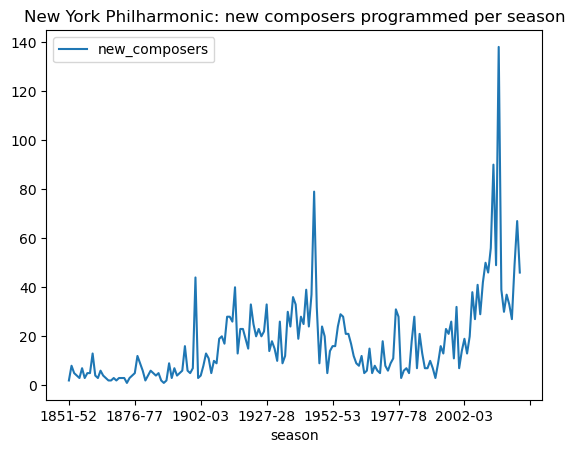

In [201]:
new_composers_after_1850.plot(x="season", y="new_composers", title="New York Philharmonic: new composers programmed per season", kind='line')

<Axes: title={'center': 'New York Philharmonic: proprotion of new \ncomposers programmed per season'}, xlabel='season'>

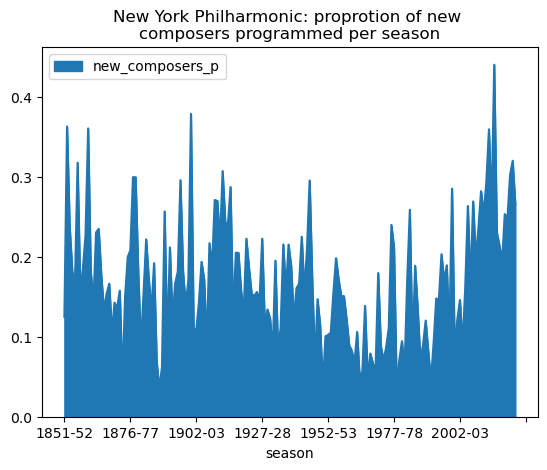

In [200]:
new_composers_after_1850.plot(x="season", y="new_composers_p", title="New York Philharmonic: proprotion of new \ncomposers programmed per season", kind='area')

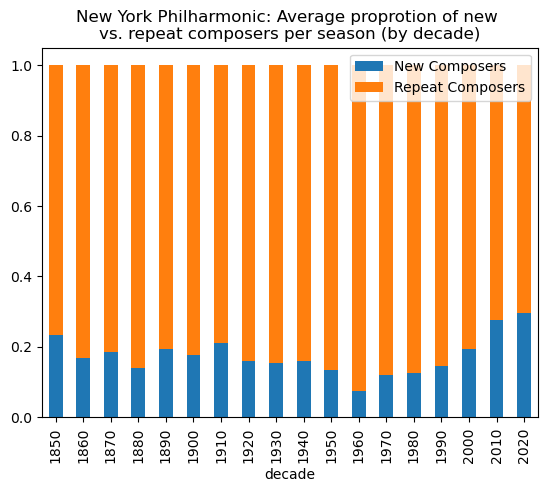

In [197]:
p_new_composers_by_decade = new_composers_after_1850[['decade_bin', 'new_composers_p', 'repeat_composers_p']].groupby('decade_bin', observed=False).mean()

p_new_composers_by_decade['decade'] = p_new_composers_by_decade.index.astype(str).str[1:5]

p_new_composers_by_decade.head()

p_new_composers_by_decade.plot(
    x="decade", 
    y=["new_composers_p", "repeat_composers_p"], 
    title="New York Philharmonic: Average proprotion of new \nvs. repeat composers per season (by decade)", 
    kind='bar',
    stacked=True)

plt.legend(["New Composers", "Repeat Composers"], loc='best')